## Python Homework 6 
Uniquename: Qifan<br>
Email: qifan@umich.edu<br>
It took me approximately 5 hours to complete this.<br>

In [16]:
import string
import itertools as it
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import scipy.stats as stat

### Problem 1

In [17]:
# Create a pandas series object
primes=it.islice(filter(lambda x: all(x%j!=0 for j in range(2,x)),it.count(2)),10)
alphaprimes=pd.Series(primes,index=list(string.ascii_lowercase)[0:10])
alphaprimes

a     2
b     3
c     5
d     7
e    11
f    13
g    17
h    19
i    23
j    29
dtype: int64

In [18]:
# Creat a data frame
arrs=[["goat"]*4+["bird"]*4+["llama"]*4,["A","A","a","a"]*3,["A","a"]*6]
index=pd.MultiIndex.from_arrays(arrs,names=["animal","parent1","parent2"])
animals=pd.DataFrame({"score1": list(range(1,13)),"score2":[2,4,4,6,6,8,8,10,10,12,12,14]},index=index)
animals

score1  score2
animal parent1 parent2                
goat   A       A             1       2
               a             2       4
       a       A             3       4
               a             4       6
bird   A       A             5       6
               a             6       8
       a       A             7       8
               a             8      10
llama  A       A             9      10
               a            10      12
       a       A            11      12
               a            12      14

### Problem 2

In [19]:
datairis=pd.read_csv("C:/Users/lenovo/Desktop/umichcourses/507/iris.csv")
datairis.shape
datairis.info()
set(datairis["Species"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


{'setosa', 'versicolor', 'virginica'}

In [20]:
datairis.apply(type)

Sepal.Length    <class 'pandas.core.series.Series'>
Sepal.Width     <class 'pandas.core.series.Series'>
Petal.Length    <class 'pandas.core.series.Series'>
Petal.Width     <class 'pandas.core.series.Series'>
Species         <class 'pandas.core.series.Series'>
dtype: object

##### How many data points? 150
##### Data type of columns: Each of the first 4 columns is a series with float64 data and the last column contains object data.
##### Column names: Sepal.Length, Sepal.Width, Petal.Length, Petal.Width, Species
##### How many species of flowers: setosa, versicolor and virginica

In [21]:
# Correct the errors in the dataset
datairis.loc[34,"Petal.Width"]=0.2
datairis.loc[37,"Sepal.Width"]=3.6
datairis.loc[37,"Petal.Length"]=1.4

In [22]:
# Add columns
datairis["Petal.Ratio"]=datairis["Petal.Length"]/datairis["Petal.Width"]
datairis["Sepal.Ratio"]=datairis["Sepal.Length"]/datairis["Sepal.Width"]
datairis.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Petal.Ratio,Sepal.Ratio
0,5.1,3.5,1.4,0.2,setosa,7.0,1.457143
1,4.9,3.0,1.4,0.2,setosa,7.0,1.633333
2,4.7,3.2,1.3,0.2,setosa,6.5,1.468750
3,4.6,3.1,1.5,0.2,setosa,7.5,1.483871
4,5.0,3.6,1.4,0.2,setosa,7.0,1.388889


In [23]:
datairis.to_csv("iris_corrected.csv",index=False)

In [24]:
datairis.groupby("Species").aggregate({"Petal.Ratio":[np.mean,np.median,np.min,np.max,np.std],"Sepal.Ratio":[np.mean,np.median,np.min,np.max,np.std]})

Petal.Ratio                                     Sepal.Ratio  \
                  mean    median      amin  amax       std        mean   
Species                                                                  
setosa        6.908000  7.000000  2.666667  15.0  2.854545    1.470188   
versicolor    3.242837  3.240385  2.666667   4.1  0.312456    2.160402   
virginica     2.780662  2.666667  2.125000   4.0  0.407367    2.230453   

                                                    
              median      amin      amax       std  
Species                                             
setosa      1.463063  1.268293  1.956522  0.118750  
versicolor  2.161290  1.764706  2.818182  0.228658  
virginica   2.169540  1.823529  2.961538  0.246992

### Problem3

In [25]:
# Read the data
mlb_df=pd.read_csv("C:/Users/lenovo/Desktop/umichcourses/507/GL2018.TXT",header=None)
mlb_df.rename(columns={9:"v_score",10:"h_score",4:"v_league",7:"h_league"},inplace=True)
mlb_df.head()

,0,1,2,3,v_league,5,6,h_league,8,v_score,...,151,152,153,154,155,156,157,158,159,160
0,20180329,0,Thu,COL,NL,1,ARI,NL,1,2,...,Nick Ahmed,6,dysoj001,Jarrod Dyson,9,corbp001,Patrick Corbin,1,NaN,Y
1,20180329,0,Thu,PHI,NL,1,ATL,NL,1,5,...,Dansby Swanson,6,flahr001,Ryan Flaherty,5,tehej001,Julio Teheran,1,NaN,Y
2,20180329,0,Thu,SFN,NL,1,LAN,NL,1,1,...,Yasmani Grandal,2,forsl001,Logan Forsythe,5,kersc001,Clayton Kershaw,1,NaN,Y
3,20180329,0,Thu,CHN,NL,1,MIA,NL,1,8,...,Miguel Rojas,6,wallc001,Chad Wallach,2,urenj001,Jose Urena,1,NaN,Y
4,20180329,0,Thu,SLN,NL,1,NYN,NL,1,4,...,Kevin Plawecki,2,syndn001,Noah Syndergaard,1,rosaa003,Amed Rosario,6,NaN,Y


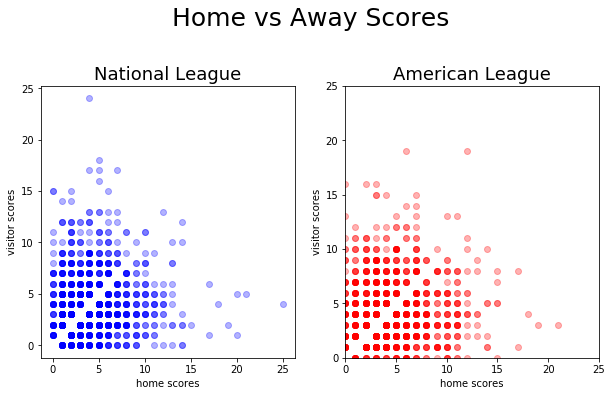

In [26]:
fig=plt.figure(figsize=(10, 5))
def issameleague(str1,str2):
    if str1==str2 and str1=="AL": return "AL"
    elif str1==str2 and str1=="NL": return "NL"
    else: return "Mixed"
mlb_df["ALorNL"]=list(map(issameleague,mlb_df["v_league"],mlb_df["h_league"]))
plt.subplot(1,2,1)
plt.scatter(mlb_df[mlb_df["ALorNL"]=="NL"]["h_score"],mlb_df[mlb_df["ALorNL"]=="NL"]["v_score"],color="blue",alpha=0.3)
plt.xlabel("home scores")
plt.ylabel("visitor scores")
plt.title("National League",fontsize=18)
plt.subplot(1,2,2)
plt.scatter(mlb_df[mlb_df["ALorNL"]=="AL"]["h_score"],mlb_df[mlb_df["ALorNL"]=="AL"]["v_score"],color="red",alpha=0.3)
plt.xlabel("home scores")
plt.ylabel("visitor scores")
plt.title("American League",fontsize=18)
plt.xlim(0,25)
plt.ylim(0,25)
plt.suptitle("Home vs Away Scores",x=0.5,y=1.1,fontsize=25)
plt.savefig("home_vs_away_scores.pdf",format="pdf",bbox_inches = "tight")
plt.show()

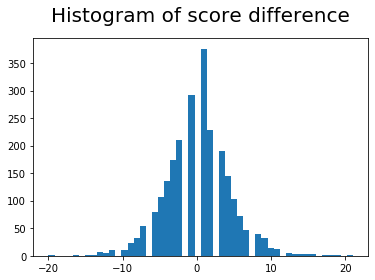

In [27]:
mlb_df["score_diff"]=mlb_df["h_score"]-mlb_df["v_score"]
plt.hist(mlb_df["score_diff"],50)
plt.title("Histogram of score difference",fontsize=20,y=1.05)
_=plt.show()

In [33]:
lambda_home=np.mean(mlb_df["h_score"])
lambda_visitor=np.mean(mlb_df["v_score"])

In [35]:
mlb_df["h_score"].corr(mlb_df["v_score"])

0.012880383725434775

##### Theoretically two poisson distributions should be independent . I calculated the correlation coefficient between h_score and v_score, which is pretty small (0.01288). This implies that even if there is some relationship it would be weak and won't change much the result. Therefore, I will model the skellam distribution based on rho=0. 

In [36]:
freq_ob=pd.Series([0]*60,index=list(range(-30,0))+list(range(1,31)))
counts=pd.value_counts(mlb_df["score_diff"])
freq_ob=freq_ob+counts
freq_ob[freq_ob.isna()]=0
mu1=lambda_home
mu2=lambda_visitor
freq_theory=stat.skellam.pmf(list(range(-30,0))+list(range(1,31)),mu1,mu2)
freq=pd.DataFrame({"ob":freq_ob}); freq["theo"]=freq_theory*2431/sum(freq_theory)
chi2stat,chi2pvalue=stat.chisquare(f_obs=freq["ob"],f_exp=freq["theo"])
chi2stat

1390614.7248847652

#####  The super large chisquare statistics indict that the model is not a good fit of the data. The chi-squared test is invalid when either obeserved values or expected values are too small, which is exactly the case in this problem. (The document says: A typical rule is that all of the observed and expected frequencies should be at least 5. )
#####  We can maybe change the condition for the model: for example we can model the skellam distribution conditioned on the fact that score_diff!=0 and |score_diff|<10.